# Project 1 Report

## Team members: Jefferson Mark Roylance , Supratik Chanda

# Introduction
This report indulges in various novel analyses of Austin_crime_report_2015 statistics. Its primary purpose is to entertain the reader and hold their attention through to the end of the report. Its primary motivation is to familiarize the authors with rudimentary data analysis, Jupyter Notebook, and the Python pandas API with intricate analysis and detailed visualization.


## Dataset

We constrain our usage of data entirely to Austin_crime_report_2015 Database. We primarily utilize the data tables with general crime info, no_of_crimes statistics, and the nature of crime prevalent in the zipcode. Each analysis uses a slightly different cleaning technique, and these techniques are detailed in the sections below. However, the dataset is already quite clean and complete, and in general all that need be done is remove entires with null values in the data subsets we work with.

## Analysis technique

We preformed four analyses. 

### Which are the most frequent crimes happened in randomly selected 10 cities?
_Analysis by: Supratik Chanda_  
This analysis is just to figure which crimes are the most frequent and which crimes should be stoppped in the respective cities to reduce the crime rate .


### How does Crime_Count varies with the unemployment rate in Austin?
### Used correlation technique to find out whether crime_frequency is directly proportional to the unemloyment rate or not
_Analysis by: Supratik Chanda_ 
A strong sense by my laureates explicitly implies that unemployment is the root cause of illegal jobs. Crime is the most obvious among them. So,this analysis is done to strenghten that inference that whether or not unemployment rate is surely the reason for rapid burst of crimes

### Which Crime has got which Clearance_status the most? Thus we can figure out the severness of the crimes in the future
_Analysis by: Supratik Chanda_ 
This analysis is made to make the intensity of punishment prevailed depending on  the type of degree and nature of the crime done. Thus,to aware the citizen not to choose the path of crime .



    
## Results

### Which are the most frequent crimes happened in randomly selected 10 cities?
Figure 1 describes  which players are the best among all .

<img src='Chart_1.png' style='height:800px'>

### How does Crime_Count varies with the unemployment rate in Austin?
Figure 2 shows whether Crime_count is directly or inversely connected with unemployment rate

<img src='Chart_2.png' style='height:800px'>

### Which Crime has got which Clearance_status the most? Thus we can figure out the severness of the crimes in the future
Figure 3 shows the total clearance status of every offenses
<img src='Crime_No.png' style='height:800px;width:2000px'>

# ANALYSIS 1: To find the most frequent  crime happening in randomly selected 10 cities in Austin . Why Random? Because the total cities covered in the dataset is 16764

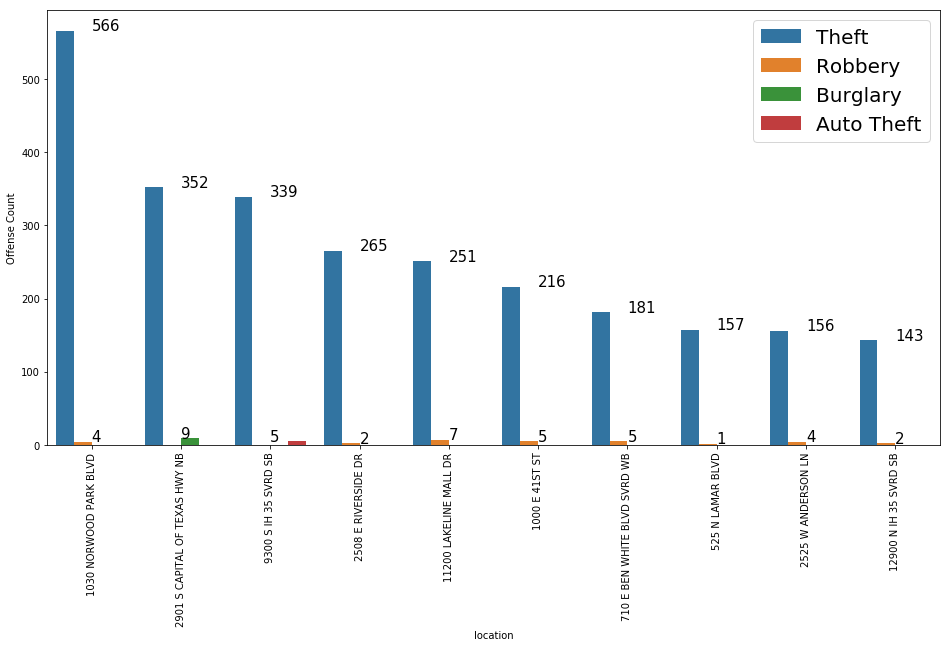

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
df=pd.read_csv('crime-housing-austin-2015.csv')
k=pd.DataFrame(df.groupby(['location','Highest_NIBRS_UCR_Offense_Description']).size())
#display(k)
k.columns=['Offense Count']
k.sort_values(by='Offense Count',ascending=False,inplace=True)
k.reset_index(drop=False,inplace=True)
#display(k[k.Location == '1030 NORWOOD PARK BLVD'])
i=0
overallDTFrame= pd.DataFrame()
for each in k.location.unique():
    overallDTFrame = pd.concat([overallDTFrame,k[k.location == each][0:2]],axis=0)
    i+=1
    if i ==10:
        break
overallDTFrame.reset_index(drop=True,inplace=True)
#display(overallDTFrame)
plt.figure(figsize=(16,8))
sns.barplot(y=overallDTFrame['Offense Count'],x=overallDTFrame['location'],hue=overallDTFrame['Highest_NIBRS_UCR_Offense_Description'])    
plt.legend(loc='upper right',fontsize=20)
j=overallDTFrame['Offense Count'].values
k=0
s=0
elem=0
while k <len(j):
    ind=0
    each=0
    while ind < 2:
        plt.annotate(str(j[k]),xy=(elem,j[k]+0.5),fontsize=15)
        ind+=1
        k+=1
        each-=1.0
    elem+=1
plt.xticks(rotation=90,fontsize=10)
plt.savefig('Chart_1.png')
plt.show()
#overallDTFrame.plot(x='Location',y='Offense Count',kind='bar')
    






#j= df.groupby(['Location','Highest_NIBRS_UCR_Offense_Description']).agg({'Location':'count'})
#j.columns=['Offense Count']
#j.reset_index(drop=False,inplace=True)
#j[j.Location == '1030 NORWOOD PARK BLVD']'''
#Which location has the most crime:Highest_NIBRS_UCR_Offense_Description
#t =measure of the difference of the means relative to the spread


# C=Cleared by Arrest O=Cleared by Exception N=Not cleared

# Investigate how no of crimes in  particular zip-codes is proportional to the unemployment rates

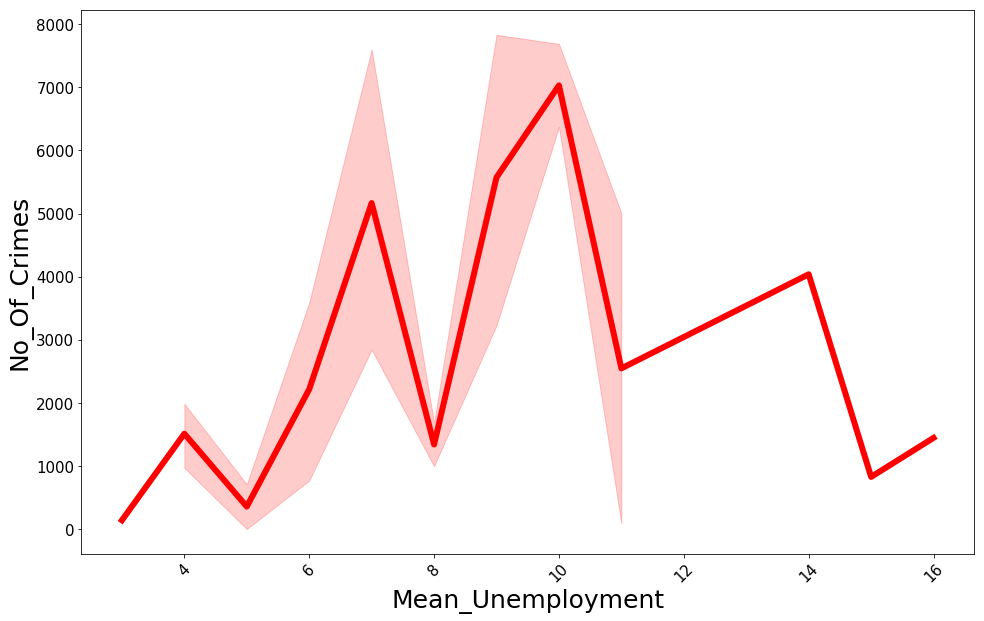

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy.stats import pearsonr as pr
dtSet = pd.read_csv('crime-housing-austin-2015.csv',usecols=['Zip_Code_Crime','Highest_Offense_Desc','Unemployment'])
dtSet.dropna(axis=0,inplace=True)
k=0
dtSet.Unemployment = dtSet.Unemployment.str.replace('%','')
dtSet.Unemployment = dtSet.Unemployment.astype(int)
#print(dtSet.dtypes)
df= dtSet.groupby('Zip_Code_Crime')
finalDT = pd.DataFrame()
for k,i in df:
    initDT = pd.concat([pd.DataFrame([k]),pd.DataFrame([i.size]),pd.DataFrame([i.Unemployment.mean()])],axis=1)
    finalDT = pd.concat([finalDT,initDT],axis=0)
finalDT.columns=['Zip_Code','No_Of_Crimes','Mean_Unemployment']
finalDT.reset_index(drop=True,inplace=True)
finalDT.sort_values(by=['No_Of_Crimes'],ascending=True,axis=0,inplace=True)
#display(finalDT)
plt.figure(figsize=(16,10))
sns.lineplot(x=finalDT['Mean_Unemployment'],y=finalDT['No_Of_Crimes'],linewidth=6,color='red')
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Mean_Unemployment',fontsize=25)
plt.ylabel('No_Of_Crimes',fontsize=25)
plt.savefig('Chart_2.png')
plt.show()


In [114]:
pearson_coef,p_value= pr(finalDT['Mean_Unemployment'],finalDT['No_Of_Crimes'])
print('pearson_coef: ',pearson_coef, 'p_value: ',p_value)
display(finalDT.corr())

pearson_coef:  0.27917473449148866 p_value:  0.09916755408711679


,Zip_Code,No_Of_Crimes,Mean_Unemployment
Zip_Code,1.000000,0.140904,-0.402752
No_Of_Crimes,0.140904,1.000000,0.279175
Mean_Unemployment,-0.402752,0.279175,1.000000


# This implies that as x increases so does y , That means no_of_crimes is directly proportional to unemployment_rate

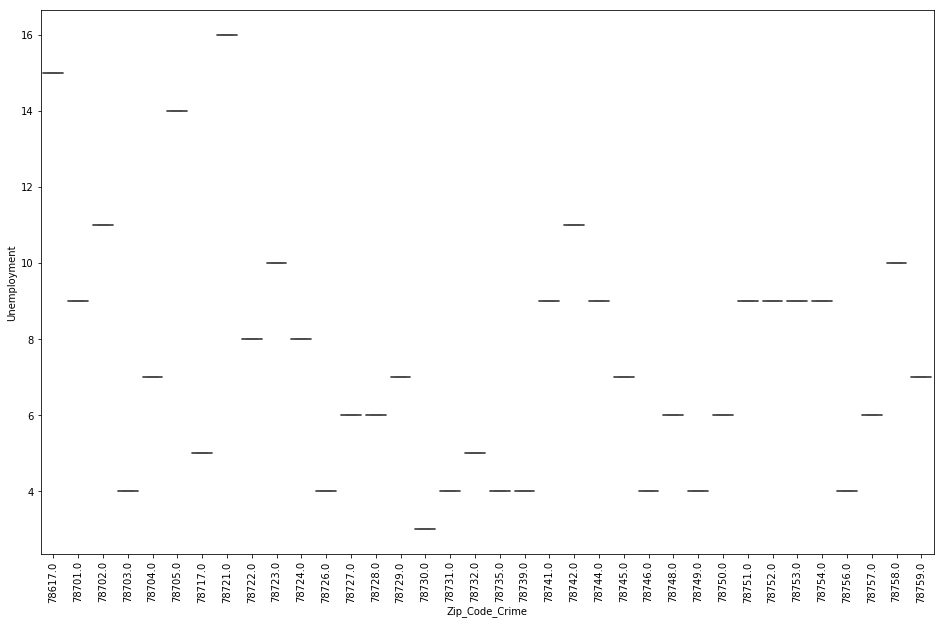

In [115]:
DT=pd.DataFrame()
for key,val in df:
    val = val.drop(columns=['Highest_Offense_Desc'])
    DT = pd.concat([DT,val],axis=0)
DT.reset_index(drop=True,inplace=True)
#display(DT)
plt.figure(figsize=(16,10))   
sns.boxplot(x=DT['Zip_Code_Crime'],y=DT['Unemployment'],palette='spring')
plt.xticks(rotation=90)
plt.show()

#Tried to find out the outliers of the unemployment for every zip_code but eventually landed up to no outliers ,hence the mean of unemployment is perfect

# Clearance order of crimes in descending order

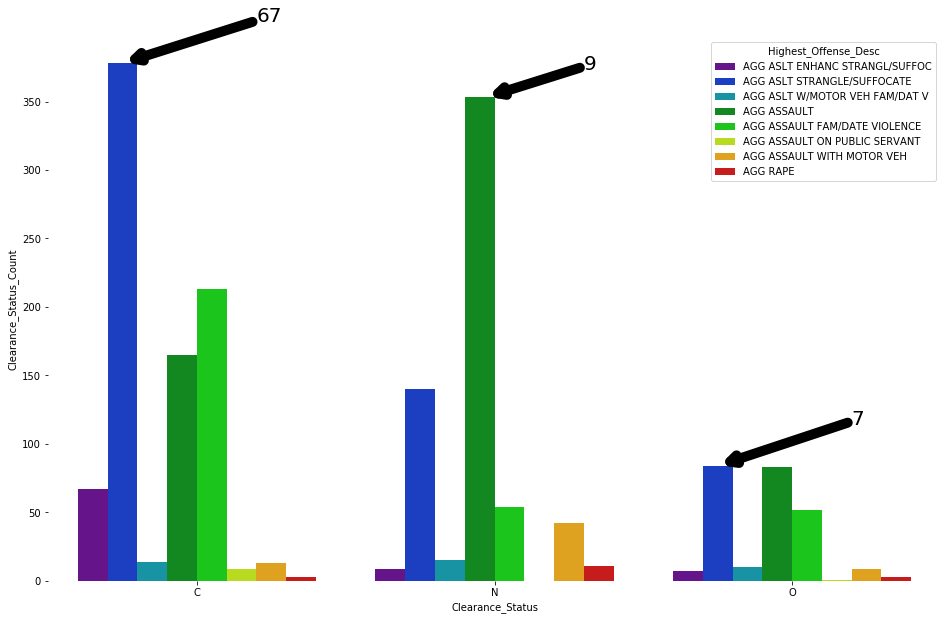

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy.stats import pearsonr as pr
dtSet = pd.read_csv('crime-housing-austin-2015.csv',usecols=['Clearance_Status','Highest_Offense_Desc'])
dtSet.dropna(axis=0,inplace=True)
dtSet
dtFinal = dtSet.groupby(['Highest_Offense_Desc','Clearance_Status']).agg({'Clearance_Status':'count'})
dtFinal.columns=['Clearance_Status_Count']
dtFinal.reset_index(drop=False,inplace=True)
#display(dtFinal.loc[0:22])
plt.figure(figsize=(16,10))
sns.barplot(x=dtFinal['Clearance_Status'].loc[0:22],y=dtFinal['Clearance_Status_Count'].loc[0:22],
            hue=dtFinal['Highest_Offense_Desc'].loc[0:22],palette='nipy_spectral')
k =[378,353,84]
for i ,val in enumerate(dtFinal['Clearance_Status_Count'].loc[0:22]):
    if i < len(k) and i !=1:
        plt.annotate(str(val),xy=(i-0.25,k[i]),xytext=(i+0.2,k[i]+30),fontsize=20,arrowprops=dict(arrowstyle='->',lw=10))
    elif i < len(k) and i==1:
        plt.annotate(str(val),xy=(i-0.03,k[i]),xytext=(i+0.3,k[i]+20),fontsize=20,arrowprops=dict(arrowstyle='->',lw=10))
plt.tick_params(left=True,top=False)      
plt.box(False)
plt.savefig('Crime_No.png')
plt.show()

In [117]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as asc
dtSet.dropna(axis=0,inplace=True)
display(dtSet.head())
lbl = LabelEncoder()
X= dtSet.loc[:,'Highest_Offense_Desc']
print(type(X),X.shape)
Y = dtSet.iloc[:,1:2].values
X = lbl.fit_transform(X).reshape(-1,1)
print(Y.shape)
for i in range(100,130):
    rc= RandomForestClassifier(n_estimators=100,random_state=0,criterion='entropy',max_leaf_nodes=10)
    X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=0,test_size=0.2)
    rc.fit(X_train,y_train)
    Y_pred = rc.predict(X_test)
    print(asc(y_test,Y_pred))

,Highest_Offense_Desc,Clearance_Status
0,AGG ROBBERY/DEADLY WEAPON,N
1,ROBBERY BY ASSAULT,N
2,BURGLARY OF RESIDENCE,N
3,BURGLARY OF RESIDENCE,N
4,BURGLARY OF RESIDENCE,N


<class 'pandas.core.series.Series'> (36649,)
(36649, 1)


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998


C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.8462482946793998
